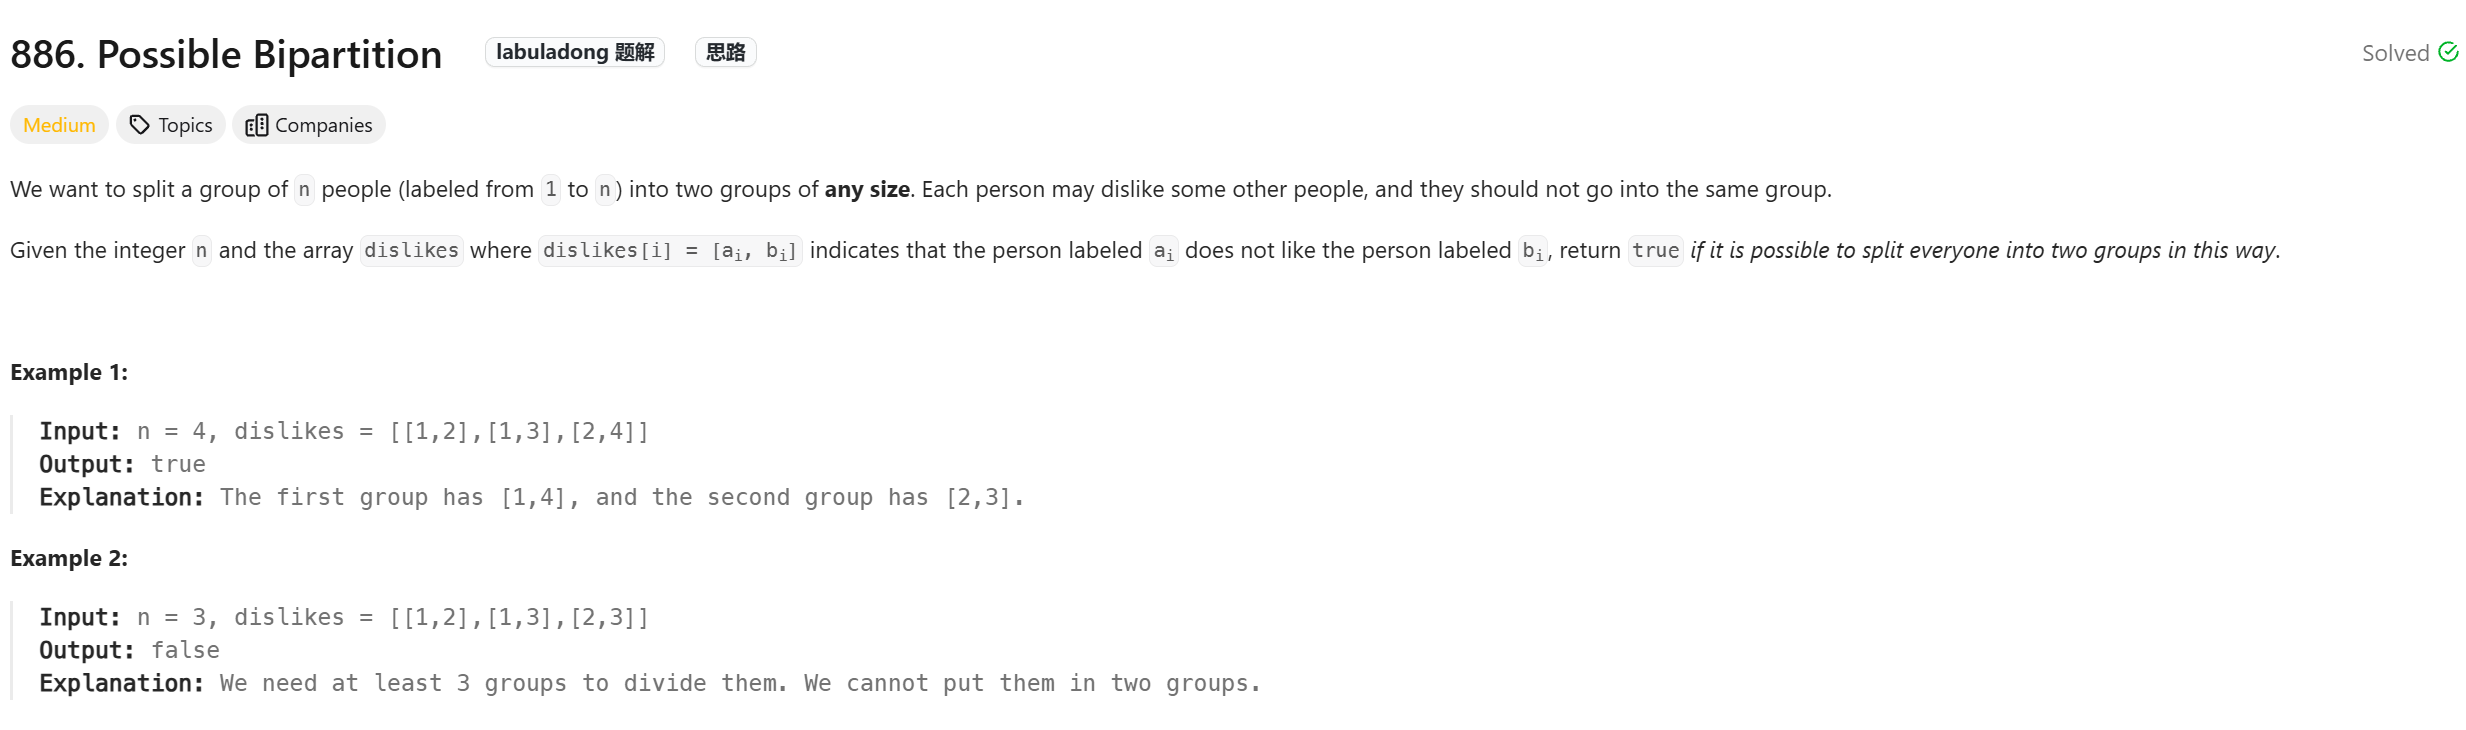

In [ ]:
class Solution:
    def __init__(self):
        self.solvable = True
        self.colors = None
        self.visited = None

    def possibleBipartition(self, n: int, dislikes: List[List[int]]) -> bool:
        self.colors = [False] * (n + 1)
        self.visited = [False] * (n + 1)

        graph = self.buildGraph(n, dislikes)

        for i in range(1, n + 1):
            self.dfs(graph, i)
        return self.solvable

    def buildGraph(self, n: int, dislikes: List[List[int]]) -> List[List[int]]:
        graph = [[] for _ in range(n + 1)]

        for val in dislikes:
            a, b = val
            # a dislike b, if a is colorA, b need to be colorB
            # birdrection here is important
            graph[a].append(b)
            graph[b].append(a)
        return graph

    def dfs(self, graph: List[List[int]], v: int):

        if not self.solvable:
            return

        if self.visited[v]:
            return

        self.visited[v] = True
        for neighbor in graph[v]:
            if self.visited[neighbor]:
                if self.colors[neighbor] == self.colors[v]:
                    self.solvable = False
                    return
            else:
                self.colors[neighbor] = not self.colors[v]
                self.dfs(graph, neighbor)
        return